In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_csv('/Users/tunder/Dropbox/python/character/metadata/filtered_fiction_plus_18c.tsv', sep ='\t')
metadata.head()

,docid,volid,recordid,author,firstname,inferreddate,birthdate,authgender,enumcron,title
0,14930,uva.x004123163,NaN,"Swift, Jonathan,",Jonathan,1784,NaN,m,v.1,The works of the Rev. Dr. Jonathan Swift
1,14931,uva.x004123168,NaN,"Swift, Jonathan,",Jonathan,1784,NaN,m,v.6,The works of the Rev. Dr. Jonathan Swift
2,14932,uva.x030576706,NaN,"Swift, Jonathan,",Jonathan,1784,NaN,m,v.11,The works of the Rev. Dr. Jonathan Swift
3,14933,uva.x000530839,NaN,"Swift, Jonathan,",Jonathan,1784,NaN,m,v.12,The works of the Rev. Dr. Jonathan Swift
4,14934,nyp.33433076096019,NaN,"Swift, Jonathan,",Jonathan,1784,NaN,m,v. 14,The works of the Rev. Dr. Jonathan Swift


In [3]:
data = pd.read_csv('prestige_character_probabilities.tsv', sep = '\t', dtype = {'docid': 'object'})
data.head()

,docid,charid,gender,pubdate,numwords,probability
0,0,0|Betsey,f,1891,334,0.462642
1,0,0|Phil,m,1891,12,0.140581
2,0,0|Elizabeth,f,1891,82,0.366735
3,0,0|Mr.Jones,m,1891,526,0.553426
4,0,0|Mr.Mitford,m,1891,14,0.386104


In [4]:
grouped = data.loc[:, ["probability", "gender", 'pubdate']].groupby('gender')
bygender = grouped.aggregate(np.mean)
bygender.head()

,probability,pubdate
gender,,
f,0.547890,1946.901165
m,0.438264,1948.086980
u,0.473054,1955.238318


In [26]:
authormeta = pd.read_csv('output/authormeta.tsv', sep = '\t')
authormeta.head()


,author,num_stories,reviewed,authgender,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
0,"Lorimer, George Horace",3,0,m,1904.666667,0.030916,0.742964,20.333333,55.788728,0.177134,0.170865,0.091833,0.113859,0.073349,0.475837
1,"Barrie, J. M",28,1,m,1901.357143,0.597358,0.996169,26.071429,141.503992,0.266682,0.246383,0.048767,0.049635,0.062973,0.482426
2,"Cable, George Washington",19,1,m,1900.578947,0.489428,0.681818,24.421053,194.500712,0.308170,0.358583,0.053117,0.053512,0.055654,0.496021
3,"Poole, Mary Belle",1,0,f,1896.000000,0.232876,0.035714,42.000000,113.119048,0.341463,0.585232,0.085613,0.078918,0.089309,0.518929
4,"Brody, Catharine",2,1,f,1931.000000,0.630779,0.148837,35.500000,163.901431,0.544118,0.658753,0.050618,0.059248,0.066039,0.488282


In [27]:
authormeta.corr()

,num_stories,reviewed,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
num_stories,1.000000,0.218885,0.136339,0.185862,0.546059,0.063713,0.014521,-0.067036,-0.059694,-0.034076,-0.048561,-0.077386,0.004343
reviewed,0.218885,1.000000,0.136778,0.476159,0.288765,0.043027,-0.059852,-0.021178,0.002188,-0.099202,-0.107984,-0.107129,0.089229
meandate,0.136339,0.136778,1.000000,0.164638,-0.029856,0.043027,-0.143136,-0.144073,-0.125291,-0.203757,-0.211386,-0.326497,-0.004891
mean_prestige,0.185862,0.476159,0.164638,1.000000,0.187538,0.031609,-0.118692,0.099911,0.105872,-0.146951,-0.180959,-0.107308,0.243137
mean_sales,0.546059,0.288765,-0.029856,0.187538,1.000000,0.087558,0.066422,-0.049083,-0.033431,-0.029619,-0.045171,-0.034872,-0.003595
numchars,0.063713,0.043027,0.043027,0.031609,0.087558,1.000000,-0.029548,0.047587,0.053322,0.016597,0.025173,0.163823,0.016406
charsize,0.014521,-0.059852,-0.143136,-0.118692,0.066422,-0.029548,1.000000,0.165401,0.167887,-0.032619,-0.022526,-0.166358,0.148788
pct_women,-0.067036,-0.021178,-0.144073,0.099911,-0.049083,0.047587,0.165401,1.000000,0.851266,-0.229009,-0.272197,-0.104359,0.678211
wordratio,-0.059694,0.002188,-0.125291,0.105872,-0.033431,0.053322,0.167887,0.851266,1.000000,-0.209035,-0.237898,-0.083992,0.612211
prob_diff,-0.034076,-0.099202,-0.203757,-0.146951,-0.029619,0.016597,-0.032619,-0.229009,-0.209035,1.000000,0.827487,0.520390,-0.161975


In [14]:
authormeta[authormeta.authgender == 'm'].corr()

,num_stories,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
num_stories,1.000000,0.141723,0.203661,0.499386,0.072355,0.042709,0.024341,0.035975,-0.028709,-0.038062,-0.097364,0.065231
meandate,0.141723,1.000000,0.097814,-0.041160,0.112701,-0.161474,-0.077726,-0.098248,-0.201756,-0.172433,-0.264975,-0.014562
mean_prestige,0.203661,0.097814,1.000000,0.208443,0.017251,-0.097868,0.210429,0.186846,-0.091080,-0.144658,-0.105495,0.345082
mean_sales,0.499386,-0.041160,0.208443,1.000000,0.070393,0.061285,0.044880,0.085258,0.025248,-0.017971,-0.068689,0.081679
numchars,0.072355,0.112701,0.017251,0.070393,1.000000,0.003731,0.016576,0.020073,0.051922,0.099212,0.228385,0.011043
charsize,0.042709,-0.161474,-0.097868,0.061285,0.003731,1.000000,0.168346,0.153375,0.086676,0.081389,-0.147900,0.097843
pct_women,0.024341,-0.077726,0.210429,0.044880,0.016576,0.168346,1.000000,0.817833,-0.052254,-0.117277,-0.056726,0.657598
wordratio,0.035975,-0.098248,0.186846,0.085258,0.020073,0.153375,0.817833,1.000000,-0.002343,-0.053145,-0.023080,0.561418
prob_diff,-0.028709,-0.201756,-0.091080,0.025248,0.051922,0.086676,-0.052254,-0.002343,1.000000,0.825301,0.399214,-0.033952
weighted_diff,-0.038062,-0.172433,-0.144658,-0.017971,0.099212,0.081389,-0.117277,-0.053145,0.825301,1.000000,0.343033,-0.050540


In [15]:
authormeta[authormeta.authgender == 'f'].corr()

,num_stories,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
num_stories,1.000000,0.070293,0.151998,0.667579,0.024708,0.028403,0.015314,0.016825,0.059267,0.052446,0.005806,0.029140
meandate,0.070293,1.000000,0.237417,-0.077555,-0.069427,-0.096531,-0.097399,-0.021226,-0.148353,-0.191635,-0.187684,-0.145022
mean_prestige,0.151998,0.237417,1.000000,0.150619,0.059172,-0.153872,-0.025213,0.008218,-0.003268,-0.042805,-0.054551,-0.029945
mean_sales,0.667579,-0.077555,0.150619,1.000000,0.121972,0.131655,0.021562,0.017285,0.062698,0.061543,0.015039,0.031240
numchars,0.024708,-0.069427,0.059172,0.121972,1.000000,-0.117479,0.107331,0.127662,0.065604,-0.005340,0.340781,0.005935
charsize,0.028403,-0.096531,-0.153872,0.131655,-0.117479,1.000000,-0.000329,0.063396,0.011968,-0.023379,-0.152545,0.086531
pct_women,0.015314,-0.097399,-0.025213,0.021562,0.107331,-0.000329,1.000000,0.716555,-0.176143,-0.153280,-0.033422,0.497102
wordratio,0.016825,-0.021226,0.008218,0.017285,0.127662,0.063396,0.716555,1.000000,-0.112095,-0.079195,0.034334,0.433225
prob_diff,0.059267,-0.148353,-0.003268,0.062698,0.065604,0.011968,-0.176143,-0.112095,1.000000,0.762709,0.493984,-0.017732
weighted_diff,0.052446,-0.191635,-0.042805,0.061543,-0.005340,-0.023379,-0.153280,-0.079195,0.762709,1.000000,0.389891,-0.024579


In [28]:
authormeta[authormeta.meandate > 1899].corr()

,num_stories,reviewed,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
num_stories,1.000000,0.216207,0.028832,0.192364,0.552781,0.080999,-0.008270,-0.020080,-0.026239,0.005039,-0.020513,-0.046593,0.044362
reviewed,0.216207,1.000000,0.118624,0.493815,0.253594,0.115210,-0.104733,0.085850,0.101939,-0.089871,-0.151084,-0.053533,0.179795
meandate,0.028832,0.118624,1.000000,0.144864,0.020717,0.285391,-0.090324,0.039179,0.045959,-0.121562,-0.116704,-0.213585,0.029217
mean_prestige,0.192364,0.493815,0.144864,1.000000,0.173665,0.077410,-0.155905,0.231569,0.235436,-0.157963,-0.216426,-0.060068,0.380519
mean_sales,0.552781,0.253594,0.020717,0.173665,1.000000,0.180814,-0.002249,-0.039367,-0.009546,-0.014755,-0.049744,-0.023630,0.034458
numchars,0.080999,0.115210,0.285391,0.077410,0.180814,1.000000,-0.157878,0.044582,0.041489,0.011531,-0.015287,0.123605,-0.017263
charsize,-0.008270,-0.104733,-0.090324,-0.155905,-0.002249,-0.157878,1.000000,0.104278,0.155188,0.027805,0.003044,-0.230880,0.149209
pct_women,-0.020080,0.085850,0.039179,0.231569,-0.039367,0.044582,0.104278,1.000000,0.874111,-0.214586,-0.301466,-0.130850,0.696367
wordratio,-0.026239,0.101939,0.045959,0.235436,-0.009546,0.041489,0.155188,0.874111,1.000000,-0.247640,-0.327152,-0.150935,0.635835
prob_diff,0.005039,-0.089871,-0.121562,-0.157963,-0.014755,0.011531,0.027805,-0.214586,-0.247640,1.000000,0.848002,0.474082,-0.115806


In [31]:
authormeta[(authormeta.meandate > 1920) & (authormeta.authgender == 'm')].corr()

,num_stories,meandate,mean_prestige,mean_sales,numchars,charsize,pct_women,wordratio,prob_diff,prob_stdev,prob_mean
num_stories,1.000000,-0.065257,0.285475,0.508761,0.040698,0.056041,0.067147,0.109698,-0.024528,-0.027788,0.131550
meandate,-0.065257,1.000000,0.134988,-0.046628,0.194593,-0.133596,0.003914,0.032082,-0.207532,-0.019468,0.019617
mean_prestige,0.285475,0.134988,1.000000,0.257232,0.022541,-0.085217,0.396409,0.379550,-0.156451,-0.044407,0.511218
mean_sales,0.508761,-0.046628,0.257232,1.000000,0.194626,0.013702,0.062069,0.175694,-0.071750,0.089569,0.169740
numchars,0.040698,0.194593,0.022541,0.194626,1.000000,-0.125138,0.012126,0.053806,0.037956,0.340389,-0.028815
charsize,0.056041,-0.133596,-0.085217,0.013702,-0.125138,1.000000,0.106259,0.095825,0.038795,-0.217598,0.103200
pct_women,0.067147,0.003914,0.396409,0.062069,0.012126,0.106259,1.000000,0.866698,-0.146658,-0.082226,0.659543
wordratio,0.109698,0.032082,0.379550,0.175694,0.053806,0.095825,0.866698,1.000000,-0.182480,-0.094531,0.604170
prob_diff,-0.024528,-0.207532,-0.156451,-0.071750,0.037956,0.038795,-0.146658,-0.182480,1.000000,0.382050,-0.108680
prob_stdev,-0.027788,-0.019468,-0.044407,0.089569,0.340389,-0.217598,-0.082226,-0.094531,0.382050,1.000000,-0.126740


In [17]:
otherauthor = pd.read_csv('pairedwithprestige.csv')

In [18]:
def trim_to_24(aname):
    if type(aname) != str:
        return 'Anonymous'

    aname = aname.strip('(),. .[0123456789]')
    if len (aname) > 24:
        return aname[0:24]
    else:
        return aname

other_author = set(otherauthor.author.apply(trim_to_24))

In [19]:
print(other_author - set(authormeta.author))

{'Overstolz, Marie Emelie ', 'Leigh, Alfred', 'Montagu, Lily H', 'Grey', 'Elton, Arthur Hallam', 'Andrews, Anabel (Follanb', 'Holyoke, Hetty', 'Pardoe', 'Fogerty, J', 'O. Douglas', 'Chatterji, Bankim Chandr', 'Post, Helen (Wilmans', 'Maria', 'Engles, William M', 'Johnston, Sir Harry', 'Aytoun, William Edmondst', 'Ingram, J. Forsyth', 'Lean, Florence', 'Newall, John', 'Vereker, Charles Smyth', 'Yale, Catharine Brooks', 'Harbert, Lizzie Boynton', 'Goff, H. N. K', 'McLain, Mary Webster', 'Hoffman, Mary J', 'Christie-Murray, David', 'Newell, Charles Martin', 'Rex, Beach', 'Leonowens, Anna Harriett', 'Hannay, James', 'Chittenden, L. E', 'Radecliffe, Noell', 'Glenn, Isa', 'Perelaer, Michael Theoph', 'Veitch, Sophie F. F', 'Reddin, Kenneth', 'Buckley, William', 'Smith, Francis Hopkinson', 'Watson, William', 'Spencer, Lillian', 'Volckhausen, Adeline', 'Colvill, Helen Hester', 'Swift, John Franklin', 'Perry, Alice', 'Bradford, O. K', 'Aïdé, Hamilton', 'Smythies, Harriet Maria ', 'Châteauclair, 

In [35]:
print(set(authormeta.author) - other_author)

set()


In [31]:
genremeta = pd.read_csv('output/genre_storymeta.tsv', sep = '\t')
genremeta.head()

,docid,author,title,authgender,pubdate,genre,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
0,2204,"Bellamy, Edward,","Looking backward, 2000-18",m,1888,scifi,8,543.750000,0.428571,0.932075,0.091992,0.091324,0.064990,0.506391
1,10645,"Zangwill, Israel,",The big bow mystery,m,1892,detective,16,145.375000,0.375000,0.143164,-0.003723,-0.008776,0.055754,0.475355
2,inu.30000007060282,"Sayers, Dorothy L.",Strong poison,f,1930,detective,38,148.315789,0.472222,0.367508,-0.007259,-0.000835,0.050134,0.482353
3,mdp.39015063544467,"Cox, Erle,",Out of the silence,m,1928,scifi,23,488.695652,0.263158,0.254914,0.062824,0.053324,0.057440,0.487150
4,pst.000068121075,"Dick, Philip K,",Eye in the sky,m,1957,scifi,14,259.500000,0.214286,0.153867,0.054941,0.066768,0.046481,0.482288


In [32]:
grouped = genremeta.groupby(['genre', 'authgender'])
genreavg = grouped.aggregate(np.mean)
genreavg

pubdate   numchars    charsize  pct_women  \
genre     authgender                                                  
detective f           1937.812500  36.062500  206.843227   0.352000   
          m           1926.147541  33.475410  192.135396   0.245472   
          u           1994.000000  73.000000  330.356164   0.308824   
          us          1896.000000  29.000000  117.827586   0.034483   
romance   f           1895.388889  42.222222  252.437968   0.445564   
scifi     f           1943.000000  35.615385  217.287870   0.369322   
          m           1941.270270  22.648649  244.365284   0.219670   
          u           1990.000000  41.000000  214.048780   0.206897   

                      wordratio  prob_diff  weighted_diff  prob_stdev  \
genre     authgender                                                    
detective f            0.378107   0.044699       0.045717    0.064738   
          m            0.197563   0.057152       0.060991    0.059404   
          u            0.484858   0.031509       0.009945    0.043880   
          us           0.010828   0.120156       0.124326    0.070629   
romance   f            0.518524   0.048879       0.049412    0.063933   
scifi     f            0.382245   0.037264       0.042581    0.057740   
          m            0.210949   0.043148       0.041544    0.056257   
          u            0.136118   0.007342       0.022740    0.047871   

                      prob_mean  
genre     authgender             
detective f            0.481725  
          m            0.477000  
          u            0.493728  
          us           0.432153  
romance   f            0.504331  
scifi     f            0.491142  
          m            0.477738  
          u            0.494571

In [7]:
genremeta.corr()

,pubdate,numchars,charsize,pct_women,wordratio,prob_diff,weighted_diff,prob_stdev,prob_mean
pubdate,1.000000,0.087487,-0.047805,-0.203835,-0.179622,-0.290928,-0.315559,-0.284285,-0.037632
numchars,0.087487,1.000000,-0.116675,0.191617,0.213407,-0.070770,-0.087493,0.118414,0.095820
charsize,-0.047805,-0.116675,1.000000,0.083578,0.045047,-0.029180,-0.024740,-0.246300,0.179546
pct_women,-0.203835,0.191617,0.083578,1.000000,0.786075,-0.104107,-0.100844,0.065427,0.561660
wordratio,-0.179622,0.213407,0.045047,0.786075,1.000000,-0.037690,-0.101150,0.058492,0.463602
prob_diff,-0.290928,-0.070770,-0.029180,-0.104107,-0.037690,1.000000,0.714091,0.483968,-0.107519
weighted_diff,-0.315559,-0.087493,-0.024740,-0.100844,-0.101150,0.714091,1.000000,0.383959,-0.084137
prob_stdev,-0.284285,0.118414,-0.246300,0.065427,0.058492,0.483968,0.383959,1.000000,-0.068062
prob_mean,-0.037632,0.095820,0.179546,0.561660,0.463602,-0.107519,-0.084137,-0.068062,1.000000


In [35]:
def after1900(date):
    if date < 1900:
        return 0
    else:
        return 1

authormeta['century'] = authormeta.meandate.apply(after1900)
    
grouped = authormeta.groupby(['century', 'authgender'])
authoravg = grouped.aggregate(np.mean)
authoravg

num_stories  reviewed     meandate  mean_prestige  \
century authgender                                                      
0       f              8.447514  0.397790  1877.738949       0.478870   
        m             11.641860  0.483721  1878.095249       0.481033   
        u              1.909091  0.227273  1871.607792       0.363867   
1       f              9.563910  0.496241  1930.825268       0.534538   
        m             15.491039  0.501792  1929.428001       0.496075   
        u              5.000000  0.392857  1927.096812       0.520311   

                    mean_sales   numchars    charsize  pct_women  wordratio  \
century authgender                                                            
0       f             0.495331  33.654888  232.038433   0.437561   0.485522   
        m             0.581735  30.629130  214.476230   0.292293   0.296706   
        u             0.248613  32.154329  204.644244   0.395810   0.413640   
1       f             0.441817  31.713569  224.399359   0.423866   0.483194   
        m             0.520256  33.337437  190.748340   0.275554   0.270708   
        u             0.229838  30.158466  194.269540   0.315528   0.343114   

                    prob_diff  weighted_diff  prob_stdev  prob_mean  
century authgender                                                   
0       f            0.055409       0.056436    0.066894   0.500467  
        m            0.068334       0.068545    0.069302   0.480436  
        u            0.061165       0.068886    0.064771   0.487076  
1       f            0.047738       0.047177    0.059574   0.501259  
        m            0.057418       0.059390    0.063218   0.484201  
        u            0.046244       0.051748    0.058423   0.489751

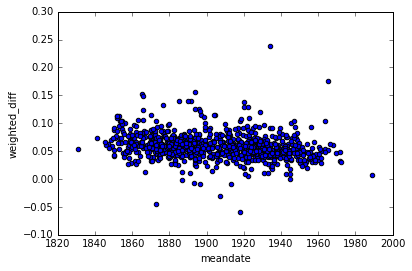

In [29]:
authormeta.plot.scatter(x = 'meandate', y = 'weighted_diff')